## Rede Neural Convolucional

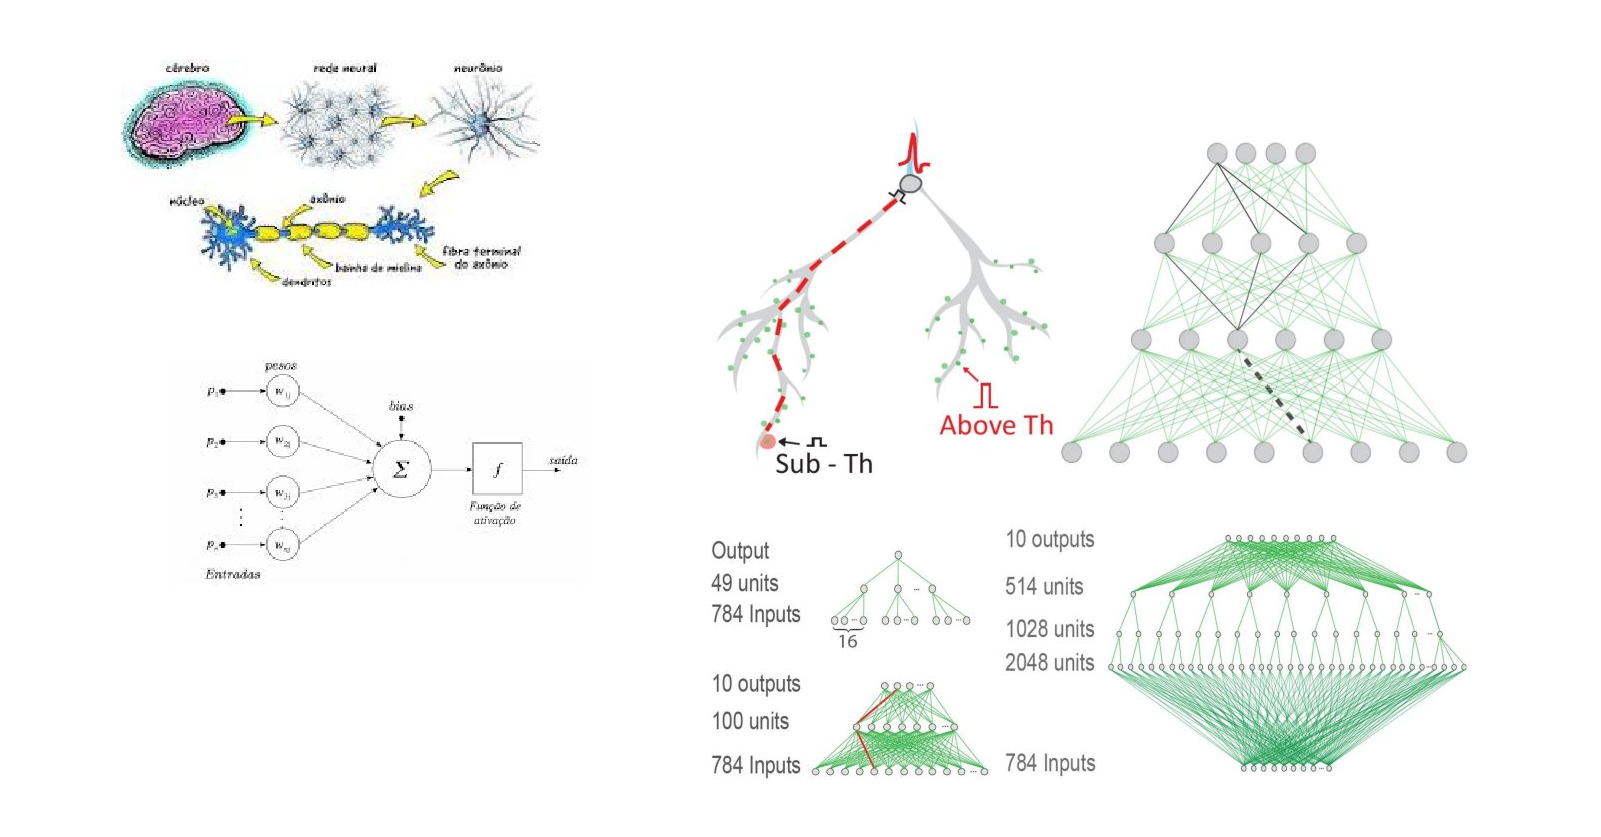

- Uma rede neural convolucional (CNN) é um tipo de modelo de aprendizado de máquina projetado para processar dados estruturados em forma de grade, como imagens.


- Inspirada pela organização do córtex visual de animais, a CNN é composta de camadas convolucionais que automaticamente e adaptativamente aprendem hierarquias de padrões e características a partir dos dados brutos de entrada.


- Essas redes são particularmente eficazes em tarefas de visão computacional, como reconhecimento de objetos e classificação de imagens, graças à sua capacidade de capturar a complexidade das formas e padrões visuais por meio de filtros convolucionais.

### Descrição do Modelo


- Este modelo de rede neural convolucional é projetado para tarefas de classificação de imagens, como a identificação de dígitos em imagens de tamanho 28x28 pixels (por exemplo, MNIST).


- Ele utiliza camadas convolucionais para extração de características e camadas densas para classificação, culminando com uma camada de saída que utiliza a função de ativação softmax para fornecer previsões probabilísticas.

In [ ]:
!pip install tensorflow # necessário para construir e treinar redes neurais
!pip install keras # é uma API de alto nível para construir redes neurais, integrada ao TensorFlow
!pip install tensorflow-datasets # tensorflow-datasets, que contém vários conjuntos de dados úteis para treinamento de modelos

## Importando as bibliotecas

In [ ]:
import numpy as np # operações numéricas e manipulação de arrays
import tensorflow as tf # framework de aprendizado de máquina de código aberto
from tensorflow.keras import datasets, layers, models # módulos do Keras para criar modelos de redes neurais, camadas e datasets
import matplotlib.pyplot as plt # visualização de gráficos e imagens

##Estrutura da Convolução


A convolução é uma operação fundamental em redes neurais convolucionais (CNNs) que visa extrair características importantes da entrada, como bordas e texturas, aplicando um filtro (ou kernel) sobre a matriz de entrada.



##Componentes




1. Matriz de Entrada: Uma matriz 5x5 que representa dados de entrada, como uma imagem em escala de cinza, onde cada valor corresponde à intensidade de um pixel.

2. Filtro (Kernel): Uma matriz 3x3 que será aplicada sobre a matriz de entrada. Neste exemplo, o filtro é utilizado para detectar características específicas, como bordas verticais.



## Processo de Convolução


A operação de convolução envolve passar o filtro sobre a matriz de entrada e calcular o produto elemento a elemento entre a região da matriz de entrada e o filtro. A soma desses produtos é atribuída ao pixel correspondente na matriz de saída.

In [ ]:
# Define uma matriz de entrada 5x5
input_matrix = np.array([[1, 2, 3, 0, 1],
                         [4, 5, 6, 1, 2],
                         [7, 8, 9, 0, 1],
                         [0, 1, 2, 3, 4],
                         [1, 2, 3, 4, 5]])

# Define um filtro 3x3, também chamado de kernel, que será usado para a operação de convolução
filter_matrix = np.array([[1, 0, -1],
                          [1, 0, -1],
                          [1, 0, -1]])

# Inicializa uma matriz de saída 3x3, onde os resultados da operação de convolução serão armazenados
output_matrix_conv = np.zeros((3, 3))

# Realiza a operação de convolução sobre a matriz de entrada usando o filtro
for i in range(3):
    for j in range(3):
        # Extrai uma região 3x3 da matriz de entrada correspondente à posição atual
        region = input_matrix[i:i+3, j:j+3]
        # Calcula o produto escalar entre a região e o filtro e armazena o resultado na matriz de saída
        output_matrix_conv[i, j] = np.sum(region * filter_matrix)

print(output_matrix_conv)

[[-6. 14. 14.]
 [-6. 10. 10.]
 [-6.  4.  4.]]


## Max Pooling:

O max pooling é uma operação usada em redes neurais convolucionais (CNNs) para reduzir a dimensionalidade de uma matriz de entrada e destacar as características mais importantes, como o valor máximo em regiões específicas. O objetivo principal do max pooling é diminuir a quantidade de parâmetros e cálculos na rede, além de fornecer uma forma de invariância à tradução e aumentar a robustez ao ruído.

##Componentes
- Matriz de Entrada: Uma matriz 4x4 que representa dados de entrada.

- Janela de Pooling: Uma janela (ou kernel) de tamanho 2x2 que será usada para encontrar o valor máximo em submatrizes da matriz de entrada.

##Processo de Max Pooling


A operação de max pooling percorre a matriz de entrada e, para cada região não sobreposta definida pela janela de pooling, seleciona o valor máximo. Este valor máximo é então colocado na matriz de saída.

In [ ]:
# Define uma nova matriz de entrada 4x4 para a operação de pooling
input_matrix = np.array([[1, 3, 2, 4],
                         [5, 6, 1, 2],
                         [3, 0, 2, 1],
                         [1, 2, 3, 0]])

# Inicializa uma matriz de saída 2x2 para armazenar os resultados da operação de max pooling
output_matrix_pool = np.zeros((2, 2))

# Aplica max pooling 2x2 na matriz de entrada
for i in range(2):
    for j in range(2):
        # Extrai uma região 2x2 da matriz de entrada correspondente à posição atual
        region = input_matrix[i*2:i*2+2, j*2:j*2+2]
        # Calcula o valor máximo na região e armazena o resultado na matriz de saída
        output_matrix_pool[i, j] = np.max(region)

print(output_matrix_pool)


[[6. 4.]
 [3. 3.]]


## Carregamento do Dataset MNIST


- O dataset MNIST é composto por imagens em escala de cinza de dígitos manuscritos (0 a 9), com tamanho 28x28 pixels. Cada imagem é rotulada com o dígito que representa.


- O conjunto de dados é dividido em dois subconjuntos: treinamento e teste.


In [ ]:
# Carrega o dataset MNIST, que contém imagens de dígitos escritos à mão
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Pré-processa as imagens de treinamento e teste para normalizar os valores dos pixels
# Redimensiona as imagens para 28x28x1 e converte os valores para ponto flutuante entre 0 e 1
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255

# Redimensiona as imagens de teste para 28x28x1 e normaliza os valores
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Plotando as primeiras 25 imagens do dataset

- Plotando as primeiras 25 imagens do conjunto de treinamento do dataset MNIST, juntamente com seus respectivos rótulos.


- A visualização das imagens e seus rótulos ajuda a entender os dados que serão usados para treinar o modelo de rede neural.

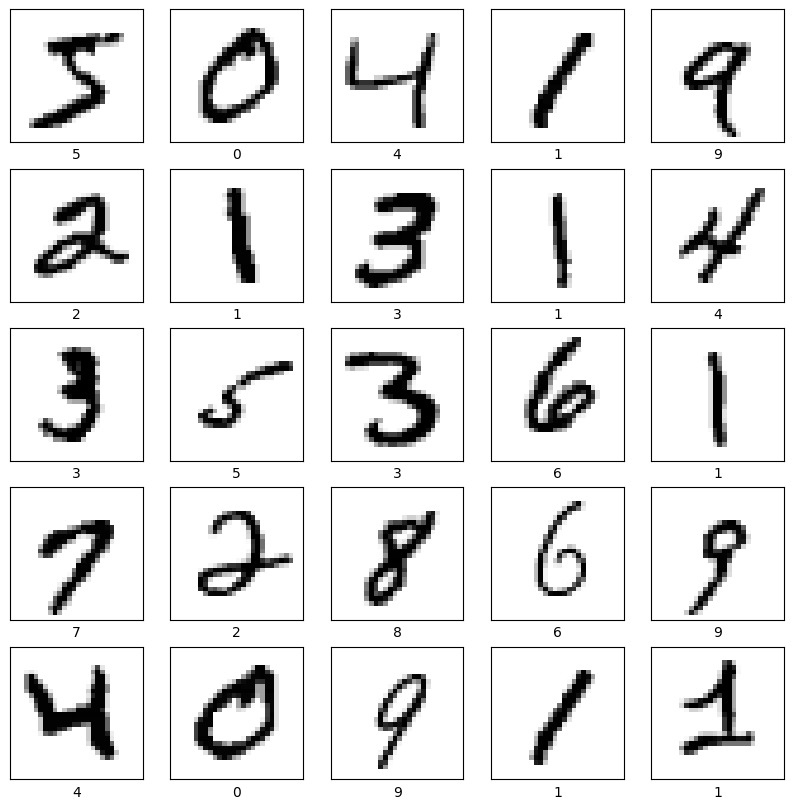

In [ ]:
# Define os nomes das classes, correspondendo aos dígitos de 0 a 9
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Plota as primeiras 25 imagens do conjunto de treinamento para visualização
plt.figure(figsize=(10, 10))  # Define o tamanho da figura como 10x10 polegadas
for i in range(25):
    plt.subplot(5, 5, i+1)  # Cria uma grade 5x5 para plotar as imagens
    plt.xticks([])  # Remove os marcadores do eixo x
    plt.yticks([])  # Remove os marcadores do eixo y
    plt.grid(False)  # Desativa a grade para as imagens
    plt.imshow(train_images[i], cmap=plt.cm.binary)  # Exibe a imagem em escala de cinza
    plt.xlabel(class_names[train_labels[i]])  # Adiciona o rótulo da classe como legenda
plt.show()


##Estrutura do Modelo CNN


- A CNN é composta por uma sequência de camadas convolucionais e de pooling seguidas por camadas totalmente conectadas (fully connected).

- Estamos construindo uma rede neural convolucional (CNN) usando a biblioteca Keras, que faz parte do TensorFlow.

- Este modelo CNN é projetado para reconhecer dígitos manuscritos no conjunto de dados MNIST.

- Vamos detalhar cada parte do código e explicar as funções das camadas na arquitetura do modelo.

In [ ]:
# Cria um modelo sequencial para a rede neural convolucional
model = models.Sequential()

# Adiciona a primeira camada convolucional com 32 filtros de tamanho 3x3 e função de ativação ReLU
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Adiciona uma camada de max pooling 2x2 para reduzir a dimensionalidade
model.add(layers.MaxPooling2D((2, 2)))

# Adiciona a segunda camada convolucional com 64 filtros de tamanho 3x3 e função de ativação ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Adiciona uma segunda camada de max pooling 2x2
model.add(layers.MaxPooling2D((2, 2)))

# Adiciona a terceira camada convolucional com 64 filtros de tamanho 3x3 e função de ativação ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Adiciona uma camada flatten para converter os mapas de características em um vetor
model.add(layers.Flatten())

# Adiciona uma camada totalmente conectada com 64 unidades e função de ativação ReLU
model.add(layers.Dense(64, activation='relu'))

# Adiciona a camada de saída totalmente conectada com 10 unidades e função de ativação softmax para classificação
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

### Explicação:

Este modelo de rede neural convolucional é projetado para tarefas de classificação de imagens, como a identificação de dígitos em imagens de tamanho 28x28 pixels (por exemplo, MNIST). Ele utiliza camadas convolucionais para extração de características e camadas densas para classificação, culminando com uma camada de saída que utiliza a função de ativação softmax para fornecer previsões probabilísticas.


-> Estrutura do Modelo
1. Criação do Modelo Sequencial

- model = models.Sequential():
- Cria um modelo sequencial que permite empilhar camadas de forma linear.
- Ideal para redes onde cada camada tem exatamente um tensor de entrada e um de saída.

--------------------------------------------------------------------------------


-> Camadas Convolucionais e Pooling
2. - Primeira Camada Convolucional

- model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))):
- 32 Filtros de 3x3: Aplica 32 filtros 3x3 nas imagens de entrada para extrair características locais.
- Função de Ativação ReLU: Aplica a função ReLU (Rectified Linear Unit) que ajuda a introduzir não-linearidade, definindo valores negativos como zero.
- input_shape=(28, 28, 1): Define o formato de entrada como imagens de 28x28 pixels com uma única camada de cor (escala de cinza).

--------------------------------------------------------------------------------

3. Primeira Camada de Max Pooling

- model.add(layers.MaxPooling2D((2, 2))):
- Pooling 2x2: Reduz a dimensionalidade dos mapas de características tomando o valor máximo em regiões 2x2.
- Redução de Dimensionalidade: Ajuda a diminuir a quantidade de parâmetros e a computação, além de tornar a rede mais robusta a variações na entrada.

--------------------------------------------------------------------------------

4. Segunda Camada Convolucional

- model.add(layers.Conv2D(64, (3, 3), activation='relu')):
- 64 Filtros de 3x3: Extrai características mais complexas da imagem utilizando 64 filtros.
- Função de Ativação ReLU: Mantém a não-linearidade da rede.

--------------------------------------------------------------------------------

5. Segunda Camada de Max Pooling

- model.add(layers.MaxPooling2D((2, 2))):
- Pooling 2x2: Novamente reduz a dimensionalidade dos mapas de características para simplificar e focar em características mais importantes.

--------------------------------------------------------------------------------

6. Terceira Camada Convolucional

- model.add(layers.Conv2D(64, (3, 3), activation='relu')):
- 64 Filtros de 3x3: Aplica mais filtros para aprender características ainda mais detalhadas e complexas.

--------------------------------------------------------------------------------

-> Camadas Totalmente Conectadas

7. Camada Flatten

- model.add(layers.Flatten()):
- Conversão em Vetor: Transforma os mapas de características em um vetor unidimensional para ser passado para as camadas densas.

--------------------------------------------------------------------------------

8. Camada Densa (Totalmente Conectada)
- model.add(layers.Dense(64, activation='relu')):
- 64 Unidades: Camada densa com 64 unidades que aprendem padrões complexos.
- Função de Ativação ReLU: Aplica não-linearidade para permitir que a rede aprenda mais complexidade.

--------------------------------------------------------------------------------

9. Camada de Saída
- model.add(layers.Dense(10, activation='softmax')):
- 10 Unidades: Corresponde ao número de classes para a tarefa de classificação (por exemplo, 10 dígitos de 0 a 9).
- Função de Ativação Softmax: Converte as saídas em probabilidades, fornecendo uma distribuição de probabilidade sobre as classes. A classe com a maior probabilidade é a previsão do modelo.

## Compilando e Treinando

- A compilação do modelo envolve a definição do otimizador, da função de perda e das métricas de avaliação. Isso é essencial para treinar a rede, pois define como o modelo será ajustado com base nos dados de entrada e nos rótulos.

In [ ]:
# Compilando o modelo
model.compile(optimizer='adam',
              # Define o otimizador a ser usado durante o treinamento. 'adam' é um otimizador popular
              # que ajusta automaticamente a taxa de aprendizado (lr) e é eficiente para muitos problemas.

              loss='sparse_categorical_crossentropy',
              # Define a função de perda que o modelo deve minimizar durante o treinamento.
              # 'sparse_categorical_crossentropy' é usada para classificação multiclasse, onde os rótulos são inteiros.

              metrics=['accuracy'])
              # Especifica a métrica de avaliação a ser monitorada. 'accuracy' mede a porcentagem de previsões corretas.

# Treinando o modelo
history = model.fit(train_images, train_labels, epochs=5,
                    # Inicia o processo de treinamento do modelo com os dados de treino (imagens e rótulos).
                    # 'epochs=5' indica que o modelo será treinado por 5 passagens completas pelos dados de treino.

                    validation_data=(test_images, test_labels))
                    # Fornece os dados de validação para avaliar o desempenho do modelo em dados não vistos
                    # durante o treinamento. Isso ajuda a monitorar se o modelo está generalizando bem.


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 34ms/step - accuracy: 0.9008 - loss: 0.3176 - val_accuracy: 0.9831 - val_loss: 0.0507
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 30ms/step - accuracy: 0.9860 - loss: 0.0443 - val_accuracy: 0.9874 - val_loss: 0.0398
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.9904 - loss: 0.0306 - val_accuracy: 0.9865 - val_loss: 0.0393
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 31ms/step - accuracy: 0.9918 - loss: 0.0249 - val_accuracy: 0.9893 - val_loss: 0.0348
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.9943 - loss: 0.0181 - val_accuracy: 0.9910 - val_loss: 0.0283


## Avaliando o modelo

- A função evaluate do Keras permite medir o desempenho do modelo em um conjunto de dados de teste, calculando a perda e as métricas definidas durante a compilação.

In [ ]:
# Avaliando o modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9871 - loss: 0.0375
Test accuracy: 0.9909999966621399


## Visualização da Acurácia

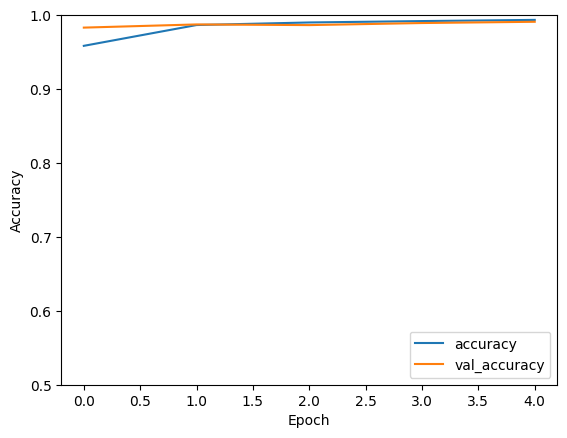

In [ ]:
# Visualizando a acurácia e a perda durante o treinamento
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()


## Visualização da Perda

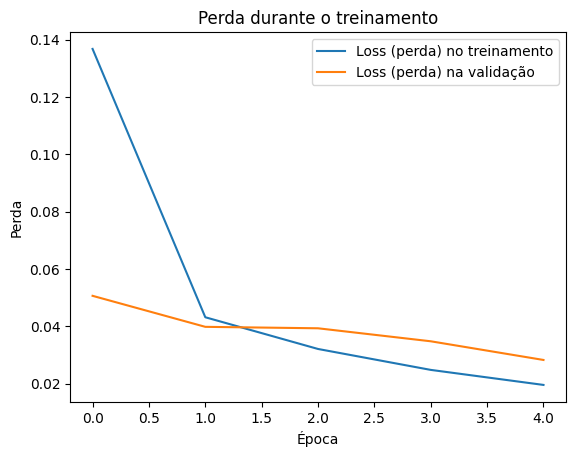

In [ ]:
# Plotando a perda (loss) durante o treinamento
plt.plot(history.history['loss'], label='Loss (perda) no treinamento')
plt.plot(history.history['val_loss'], label='Loss (perda) na validação')
plt.title('Perda durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.show()

## Visualizando a Precisão

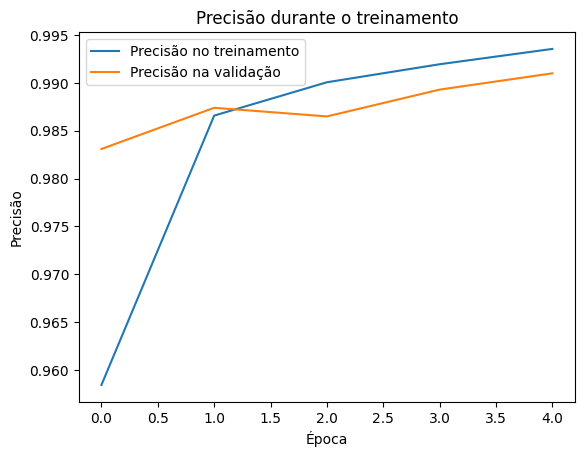

In [ ]:
# Plotando a precisão durante o treinamento
plt.plot(history.history['accuracy'], label='Precisão no treinamento')
plt.plot(history.history['val_accuracy'], label='Precisão na validação')
plt.title('Precisão durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Precisão')
plt.legend()
plt.show()

## Gerando Previsões com o Modelo

- A função model.predict é usada para obter as previsões do modelo para as imagens de teste:



313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


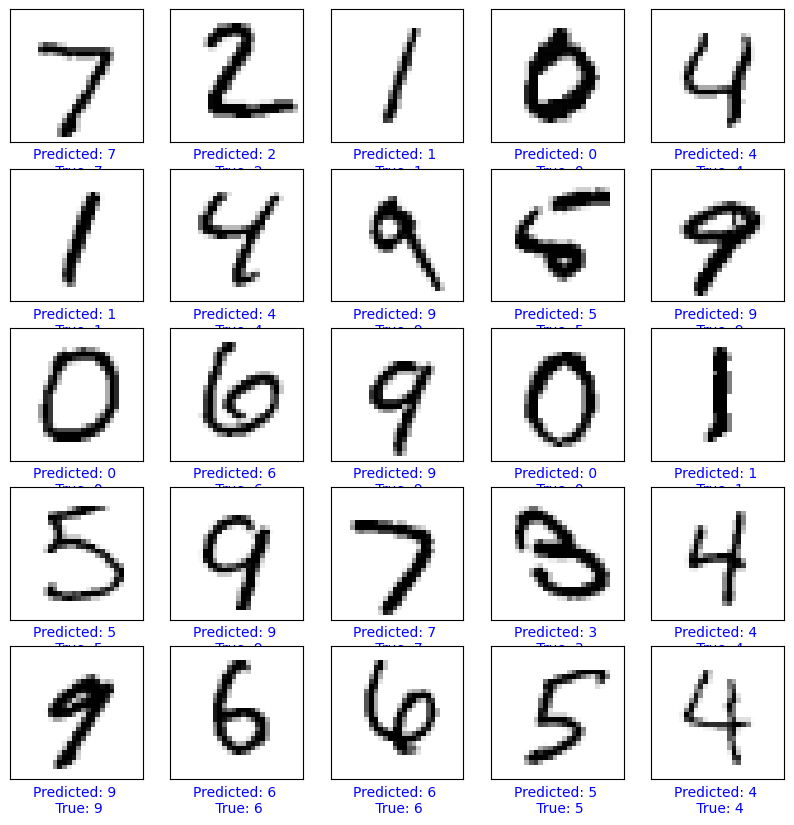

In [ ]:
# Gerando as previsões para os dados de teste
predictions = model.predict(test_images)
# Usa o modelo treinado para prever os rótulos das imagens de teste.
# 'predictions' contém as probabilidades para cada classe (0-9) para cada imagem de teste.

# Plotando algumas imagens de teste com as previsões do modelo
plt.figure(figsize=(10,10))
# Cria uma nova figura de tamanho 10x10 para plotar as imagens em uma grade.

for i in range(25):
    # Itera sobre as primeiras 25 imagens do conjunto de teste.
    plt.subplot(5,5,i+1)
    # Cria um subplot de 5x5 na posição i+1.
    plt.xticks([])
    # Remove os marcadores (ticks) do eixo x para uma apresentação mais limpa.
    plt.yticks([])
    # Remove os marcadores (ticks) do eixo y para uma apresentação mais limpa.
    plt.grid(False)
    # Desativa a grade no subplot para melhorar a estética visual.
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    # Mostra a imagem de teste i em escala de cinza. O reshape garante que a imagem esteja no formato correto (28x28).

    predicted_label = np.argmax(predictions[i])
    # Obtém o índice da classe com a maior probabilidade prevista para a imagem i.
    # Esta é a previsão do modelo para o dígito da imagem.

    true_label = test_labels[i]
    # Obtém o rótulo verdadeiro para a imagem i do conjunto de teste.

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    # Se a previsão estiver correta (igual ao rótulo verdadeiro), define a cor do texto da legenda como azul.
    # Caso contrário, define a cor do texto como vermelho.

    plt.xlabel(f'Predicted: {predicted_label} \n True: {true_label}', color=color)
    # Define a legenda abaixo da imagem, mostrando a previsão do modelo e o rótulo verdadeiro.
    # A cor do texto é definida com base na precisão da previsão.

plt.show()
# Exibe a figura com todas as subplots, mostrando as imagens de teste com suas previsões e rótulos verdadeiros.
